## expt_group1.ipynb
### WESmith 05/08/20

In [1]:
import phial.experiment as ws
import phial.toolbox  as tb
import phial.node_functions as nf
from phial.experiment import Experiment
from phial.utils import tic,toc
tic() # start tracking time of Notebook load

# ----------------------------------------------------------------------------------------------

In [2]:
exp = Experiment(
    [('A', 'B'), ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    funcs=dict(A=nf.OR_func, B=nf.AND_func, C=nf.XOR_func),
    title='3-node bidirectional or, xor, and',  # used in Mayner 2018 paper
)
%time exp.run()
exp.info()

CPU times: user 85.8 ms, sys: 229 ms, total: 315 ms
Wall time: 473 ms


{'timestamp': '2020-05-11 19:16:00.201700',
 'duration': 0.4733225149102509,
 'results': {'010': {'phi': 0.243056, 'elapsed_seconds': 0.09669542917981744},
  '100': {'phi': 0.243056, 'elapsed_seconds': 0.09058015304617584},
  '001': {'phi': 0.243056, 'elapsed_seconds': 0.09121234598569572},
  '000': {'phi': 0.194445, 'elapsed_seconds': 0.09506661794148386},
  '111': {'phi': 0.499999, 'elapsed_seconds': 0.09899031207896769}},
 'filename': None,
 'uname': uname_result(system='Linux', node='chimp20', release='5.3.0-51-generic', version='#44~18.04.2-Ubuntu SMP Thu Apr 23 14:27:18 UTC 2020', machine='x86_64', processor='x86_64')}

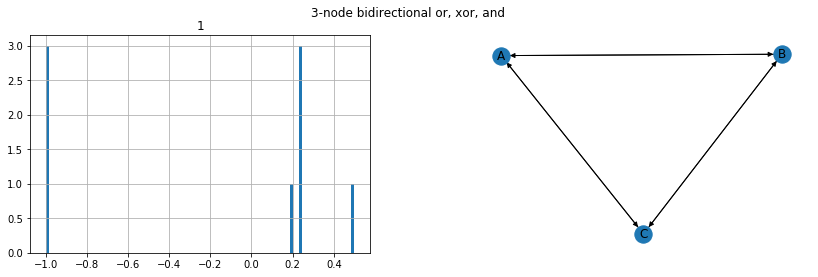

In [3]:
exp.analyze(countUnreachable=True)

# ----------------------------------------------------------------------------------------------

CPU times: user 624 ms, sys: 652 ms, total: 1.28 s
Wall time: 3.57 s


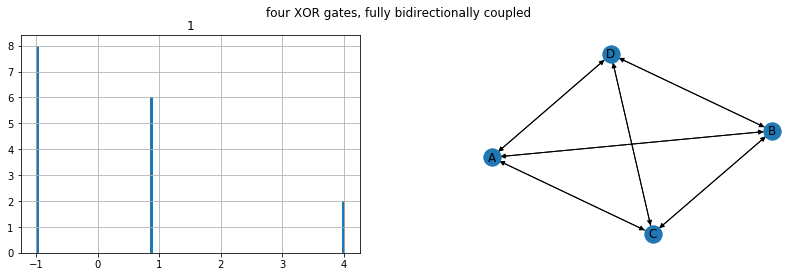

In [4]:
exp = Experiment(
    title = 'four XOR gates, fully bidirectionally coupled',
    edges =  [('A', 'B'), ('A', 'C'), ('A', 'D'),
          ('B', 'A'), ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'), ('C', 'D'),
          ('D', 'A'), ('D', 'B'), ('D', 'C'),
         ],
    funcs = dict(A=nf.XOR_func, B=nf.XOR_func, C=nf.XOR_func, D=nf.XOR_func),
)
%time exp.run(plot=True, countUnreachable=True)

# ----------------------------------------------------------------------------------------------

In [5]:
exp = Experiment(
    title = 'four XOR gates, removing one bidirectional link',
    edges =  [('A', 'C'), ('A', 'D'),
          ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'), ('C', 'D'),
          ('D', 'A'), ('D', 'B'), ('D', 'C'),
         ],
        funcs = dict(A=nf.XOR_func, B=nf.XOR_func, C=nf.XOR_func, D=nf.XOR_func),
)
%time exp.run(plot=True, countUnreachable=True)

CPU times: user 219 ms, sys: 325 ms, total: 545 ms
Wall time: 2.03 s


# ----------------------------------------------------------------------------------------------

In [6]:
exp = Experiment(
    title = 'four XOR gates, removing two bidirectional links',
    edges =  [('A', 'C'), ('A', 'D'),
          ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'),
          ('D', 'A'), ('D', 'B'),
         ],
    funcs = dict(A=nf.XOR_func, B=nf.XOR_func, C=nf.XOR_func, D=nf.XOR_func),
)
%time exp.run(plot=True, countUnreachable=True)

CPU times: user 93.3 ms, sys: 208 ms, total: 301 ms
Wall time: 530 ms


# ----------------------------------------------------------------------------------------------

In [7]:
exp = Experiment(
    title = 'four XOR gates, removing one DIRECTIONAL link',
    edges =  [('A', 'B'), ('A', 'C'), ('A', 'D'),
          ('B', 'A'), ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'), ('C', 'D'),
          ('D', 'A'), ('D', 'B'),
         ],
    funcs = dict(A=nf.XOR_func, B=nf.XOR_func, C=nf.XOR_func, D=nf.XOR_func),
)
%time exp.run(plot=True, countUnreachable=True)

CPU times: user 435 ms, sys: 436 ms, total: 871 ms
Wall time: 3.54 s


# ----------------------------------------------------------------------------------------------

In [8]:
exp = Experiment(
    title = ' two identical 3-node systems, bidirectionally coupled at an XOR node',
    comment = 'This takes 25m on acer laptop',
    edges =  [('A', 'B'), ('A', 'C'), 
          ('B', 'A'), ('B', 'C'), 
          ('C', 'A'), ('C', 'B'),
          ('D', 'E'), ('D', 'F'), 
          ('E', 'D'), ('E', 'F'), 
          ('F', 'D'), ('F', 'E'),
          ('C', 'F'), ('F', 'C')  # xor's are bidirectionally coupled
         ],
        funcs = dict(A=nf.OR_func, B=nf.AND_func, C=nf.XOR_func, D=nf.OR_func, E=nf.AND_func, F=nf.XOR_func),
)
%time exp.run(plot=True, countUnreachable=True)

CPU times: user 20.9 s, sys: 3.4 s, total: 24.3 s
Wall time: 9min 25s


In [9]:
exp.info()

{'timestamp': '2020-05-11 19:16:11.157469',
 'duration': 565.7219690908678,
 'results': {'011111': {'phi': 1.472219, 'elapsed_seconds': 10.97200954100117},
  '101011': {'phi': 1.388883, 'elapsed_seconds': 15.451618660008535},
  '000011': {'phi': 0.443174, 'elapsed_seconds': 21.303399592870846},
  '111011': {'phi': 1.472219, 'elapsed_seconds': 11.397664548130706},
  '100001': {'phi': 0.394839, 'elapsed_seconds': 20.23949534399435},
  '001100': {'phi': 0.394839, 'elapsed_seconds': 20.800285414094105},
  '011000': {'phi': 0.443174, 'elapsed_seconds': 23.321336660068482},
  '000010': {'phi': 0.613092, 'elapsed_seconds': 15.243721364997327},
  '001111': {'phi': 0.583054, 'elapsed_seconds': 19.04239367786795},
  '100000': {'phi': 0.613092, 'elapsed_seconds': 16.034895431017503},
  '101111': {'phi': 1.472219, 'elapsed_seconds': 11.252557951025665},
  '101000': {'phi': 0.443174, 'elapsed_seconds': 23.34108644700609},
  '001010': {'phi': 0.394839, 'elapsed_seconds': 19.93210498895496},
  '00000

# ----------------------------------------------------------------------------------------------

In [10]:
import datetime
elapsed = toc()  # Seconds since start of Notebook load (assuming fresh run)
print(f'Elapsed seconds={elapsed}')
print(f'Completed on: {str(datetime.datetime.now())}')

Elapsed seconds=576.701220914023
Completed on: 2020-05-11 19:25:36.887970
